# Обработка медицинксих изображений
## Лабораторная работа №№1,2 
Выполнил студент БМТ1-12М     
Колокольников Георгий

# 0. Подготовительный этап

In [1]:
%matplotlib inline

In [2]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.signal import convolve2d
import scipy.ndimage as ndi
from math import sqrt, cos, sin, pi, exp
import warnings
warnings.filterwarnings('ignore')

In [3]:
def rgb2gray(rgb):
    """
    Функция переводит 3х-канальное rgb изображение в 
    одноканальное серошкальное
    """
    return np.dot(rgb[...,:3],[0.299, 0.587, 0.114])

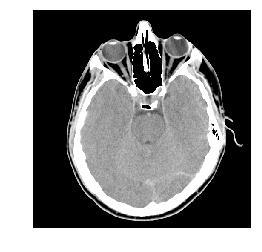

In [4]:
im_head = rgb2gray(imread('head-CT.tif',False, 'RGB' ))
plt.imshow(im_head, cmap='gray')
plt.axis('off')
plt.show()

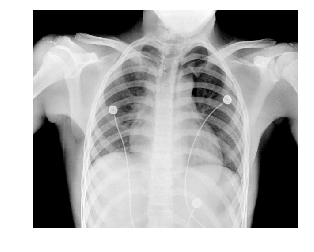

In [5]:
im_chest = rgb2gray(imread('chest-xray.tif',False, 'RGB' ))
plt.imshow(im_chest, cmap='gray')
plt.axis('off')
plt.show()

# 1. Базовые пеобразования цифрового изображения

1 . Отражения по горизонтали

In [6]:
im_chest_h_flip = np.empty([im_chest.shape[0], im_chest.shape[1]])

In [7]:
for i in range(0, im_chest.shape[0]):
    for j in range(0, im_chest.shape[1]):
        im_chest_h_flip[i,j] = im_chest[i, im_chest.shape[1]-1-j]

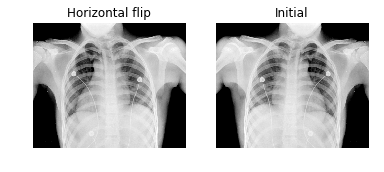

In [8]:
plt.subplot(1,2,1)
plt.imshow(im_chest_h_flip, cmap='gray')
plt.axis('off')
plt.title('Horizontal flip')

plt.subplot(1,2,2)
plt.imshow(im_chest, cmap='gray')
plt.axis('off')
plt.title('Initial')
plt.show()

1.2 . Отражение по вертикали

In [9]:
im_chest_v_flip = np.empty([im_chest.shape[0], im_chest.shape[1]])
for i in range(0, im_chest.shape[0]):
    for j in range(0, im_chest.shape[1]):
        im_chest_v_flip[i,j] = im_chest[im_chest.shape[0]-1-i, j]

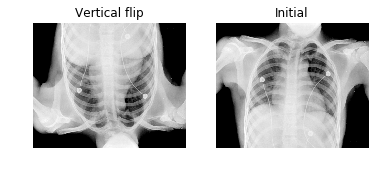

In [10]:
plt.subplot(1,2,1)
plt.imshow(im_chest_v_flip, cmap='gray')
plt.axis('off')
plt.title('Vertical flip')

plt.subplot(1,2,2)
plt.imshow(im_chest, cmap='gray')
plt.axis('off')
plt.title('Initial')

plt.show()

2 . Поворот 

In [11]:
# Рассчитаем максимальныый размер изображения
size_new = int(sqrt(im_chest.shape[0]**2 + im_chest.shape[1]**2))

In [12]:
size_new

776

In [13]:
# Центр поворота
x0, y0 = (int(im_chest.shape[0]/2), int(im_chest.shape[1]/2))

In [14]:
# Вычисление новых координат и перенос интенсивностей
im_chest_rotate = np.empty([size_new, size_new])
phi = pi/2
for i in range(0, im_chest.shape[0]):
    for j in range(0, im_chest.shape[1]):
        x_new = int((i-x0)*cos(phi) - (j-y0)*sin(phi) + sqrt(im_chest.shape[0]**2 + im_chest.shape[1]**2)/2)
        y_new = int((i-x0)*sin(phi) + (j-y0)*cos(phi) + sqrt(im_chest.shape[0]**2 + im_chest.shape[1]**2)/2)
        im_chest_rotate[x_new,y_new] = im_chest[i, j]

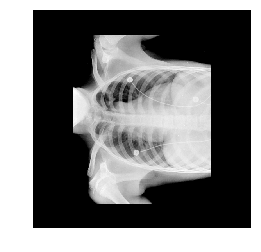

In [15]:
plt.imshow(im_chest_rotate, cmap='gray')
plt.axis('off')
plt.show()

3 . Инверсия

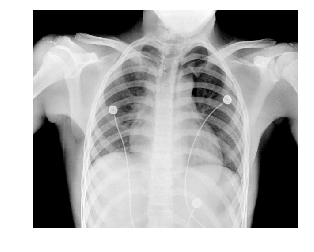

In [16]:
# Нормируем изображение, так что примаются значения от 0 до 1
im_chest_norm = im_chest/255
plt.imshow(im_chest_norm, cmap='gray')
plt.axis('off')
plt.show()

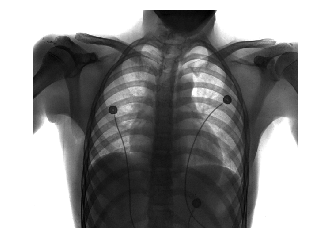

In [17]:
im_chest_invert = 1 - im_chest_norm
plt.imshow(im_chest_invert, cmap='gray')
plt.axis('off')
plt.show()

4 . Фильтр собеля

In [18]:
# Зададим горизонтальный фильтр Собеля
Sobel_h = np.array([[-1,-2,-1],
                    [0, 0, 0],
                    [1, 2,1]])
# Зададим вертикальный фильтр Собеля
Sobel_v = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

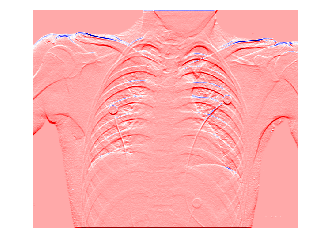

In [19]:
im_chest_Sob_h = ndi.convolve(im_chest_norm, Sobel_h)
plt.imshow(im_chest_Sob_h, cmap='seismic')
plt.axis('off')
plt.show()

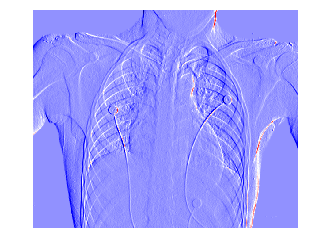

In [20]:
im_chest_Sob_v = ndi.convolve(im_chest_norm, Sobel_v)
plt.imshow(im_chest_Sob_v, cmap='seismic')
plt.axis('off')
plt.show()

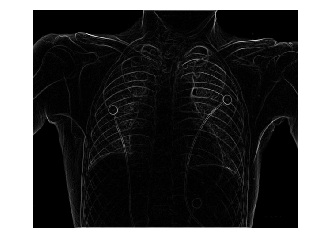

In [21]:
im_chest_Sobel = np.sqrt(np.square(im_chest_Sob_h) + np.square(im_chest_Sob_v))
plt.imshow(im_chest_Sobel, cmap='gray')
plt.axis('off')
plt.show()

Попробуем встроенную функцию

In [22]:
im_chest_built_Sobel_v = ndi.sobel(im_chest_norm, axis = 0)
im_chest_built_Sobel_h = ndi.sobel(im_chest_norm, axis = 1)
im_chest_built_Sobel = np.sqrt(np.square(im_chest_built_Sobel_h) + np.square(im_chest_built_Sobel_v))

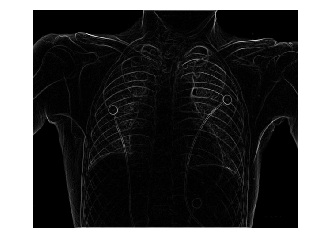

In [23]:
plt.imshow(im_chest_built_Sobel, cmap='gray')
plt.axis('off')
plt.show()

Результаты совпадают

5 . Гамма коррекция

In [24]:
im_chest = im_chest_norm
A = 1
gamma = 0.3
im_chest_gamma = A*np.power(im_chest, gamma)

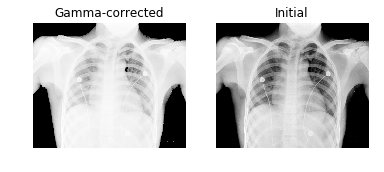

In [25]:
plt.subplot(1,2,1)
plt.imshow(im_chest_gamma, cmap='gray')
plt.axis('off')
plt.title('Gamma-corrected')

plt.subplot(1,2,2)
plt.imshow(im_chest_norm, cmap='gray')
plt.axis('off')
plt.title('Initial')
plt.show()

6 . Медианная фильтрация

In [26]:
# Размер окна 
w = 100

In [27]:
im_chest_median = np.empty([im_chest.shape[0], im_chest.shape[1]])
for i in range(0, im_chest.shape[0]):
    for j in range(0, im_chest.shape[1]):
        im_chest_median[i,j] = np.median(im_chest[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])

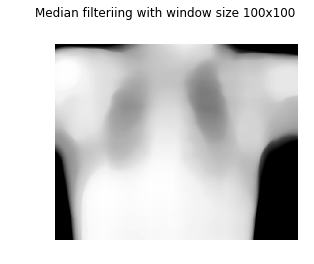

In [28]:
plt.imshow(im_chest_median, cmap='gray')
plt.axis('off')
plt.title('Median filteriing with window size '+str(w)+'x'+str(w))
plt.show()

7 . Свертка с фильтром Гаусса

In [29]:
# размер окна
w = 10

#Значение сигма (рассмотрим два значения)
sigma_1 = 1
sigma_2 = 1/(2*sqrt(3))

# центр маски
x0, y0 = (int(w/2), int(w/2))

In [30]:
gauss_mask_1 = np.empty([w, w])
gauss_mask_2 = np.empty([w, w])
for i in range(0, w):
    for j in range(0, w):
        gauss_mask_1[i,j] = (1/(2*pi*sigma_1))*exp(-(((i-x0)**2 + (j-y0)**2)/(2*sigma_1**2)))
        gauss_mask_2[i,j] = (1/(2*pi*sigma_2))*exp(-(((i-x0)**2 + (j-y0)**2)/(2*sigma_2**2)))

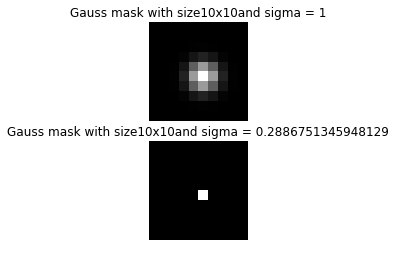

In [31]:
plt.subplot(2,1,1)
plt.imshow(gauss_mask_1, cmap='gray')
plt.axis('off')
plt.title('Gauss mask with size'+str(w)+'x'+str(w)+'and sigma = '+str(sigma_1))

plt.subplot(2,1,2)
plt.imshow(gauss_mask_2, cmap='gray')
plt.axis('off')
plt.title('Gauss mask with size'+str(w)+'x'+str(w)+'and sigma = '+str(sigma_2))
plt.show()

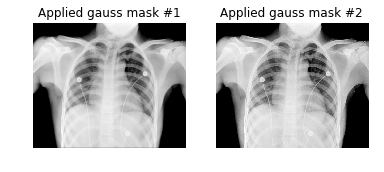

In [32]:
im_chest_gauss_1 = ndi.convolve(im_chest, gauss_mask_1)
plt.subplot(1,2,1)
plt.imshow(im_chest_gauss_1, cmap='gray')
plt.title('Applied gauss mask #1')
plt.axis('off')

im_chest_gauss_2 = ndi.convolve(im_chest, gauss_mask_2)
plt.subplot(1,2,2)
plt.imshow(im_chest_gauss_2, cmap='gray')
plt.axis('off')
plt.title('Applied gauss mask #2')
plt.show()

8 . Построение гистограммы (для ненормированного изображения и без использования встроенных функций)

In [33]:
# Используем ненормированное изображение im_head
hist_value = np.zeros([256])
hist_range = np.linspace(0, 255, 256)
for k in range(0,256):
    for i in range(im_head.shape[0]):
        for j in range(im_head.shape[1]):
            if im_head[i,j]==k:
                hist_value[k]+=1

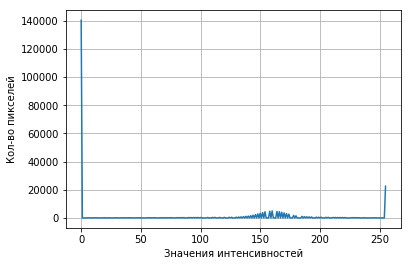

In [34]:
plt.plot(hist_range, hist_value)
plt.xlabel('Значения интенсивностей')
plt.ylabel('Кол-во пикселей')
plt.grid()
plt.show()

Рассмотрим график без учета нулевой интенсивности

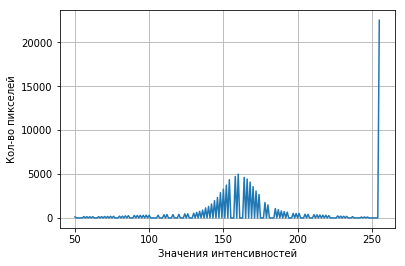

In [35]:
plt.plot(hist_range[50:], hist_value[50:])
plt.xlabel('Значения интенсивностей')
plt.ylabel('Кол-во пикселей')
plt.grid()
plt.show()

9 . Бинаризация

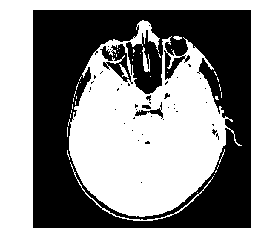

In [36]:
# Выберем в качестве порога значение 125
thrshld = 125

im_head_bin = np.zeros([im_head.shape[0], im_head.shape[1]])
im_head_bin = im_head > thrshld

plt.imshow(im_head_bin, cmap='gray')
plt.axis('off')
plt.show()

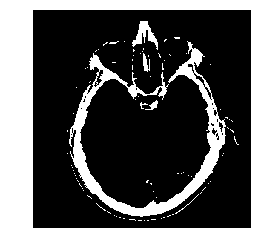

In [37]:
# Рассмотрим использование порога 200
thrshld_1 = 200

im_head_bin_1 = np.zeros([im_head.shape[0], im_head.shape[1]])
im_head_bin_1 = im_head > thrshld_1

plt.imshow(im_head_bin_1, cmap='gray')
plt.axis('off')
plt.show()

# 2. Создание зашумленных изображений

1 . Моделирование аддитивного гауссовского шума

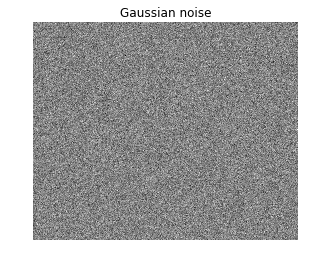

In [38]:
mu = 0
sigma = 0.3
NoiseG = np.random.normal(mu, sigma, (im_chest.shape[0], im_chest.shape[1]))
plt.imshow(NoiseG, cmap='gray')
plt.axis('off')
plt.title('Gaussian noise')
plt.show()

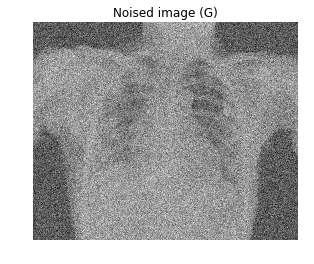

In [39]:
im_chest_noiseg = im_chest + NoiseG
plt.imshow(im_chest_noiseg, cmap='gray')
plt.axis('off')
plt.title('Noised image (G)')
plt.show()

2 . Моделирование шума типа "соль и перец"

In [40]:
# Соль 
size_salt = 3500
I_s_x = np.random.randint(0, im_chest.shape[0], size_salt)
I_s_y = np.random.randint(0, im_chest.shape[1], size_salt)

# Перец
size_pepper = 3000
I_p_x = np.random.randint(0, im_chest.shape[0], size_pepper)
I_p_y = np.random.randint(0, im_chest.shape[1], size_pepper)

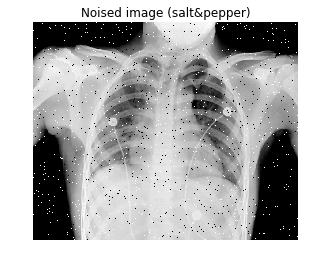

In [41]:
im_chest_noise_sp = np.array(im_chest)
# Добавим соли
for i in range(0, I_s_y.shape[0]):
    im_chest_noise_sp[I_s_x[i],I_s_y[i]] = 1

# Добавим перца
for i in range(0, I_p_y.shape[0]):
    im_chest_noise_sp[I_p_x[i],I_p_y[i]] = 0
    
plt.imshow(im_chest_noise_sp, cmap='gray')
plt.axis('off')
plt.title('Noised image (salt&pepper)')
plt.show()

3 . Наложение обоих шумов

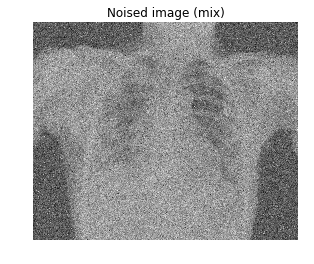

In [42]:
im_chest_noise_mixed = im_chest_noise_sp + NoiseG
plt.imshow(im_chest_noise_mixed, cmap='gray')
plt.axis('off')
plt.title('Noised image (mix)')
plt.show()

# Подавление шумов

1 . Усредняющие фильтры

а) Среднеарифметический фильтр

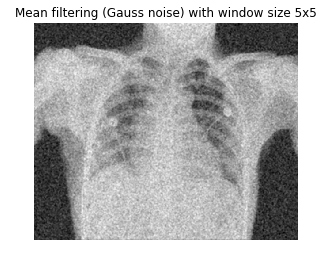

In [43]:
# Размер окна
w = 5

im_chest_mean_noiseg = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_mean_noiseg[i,j] = np.mean(im_chest_noiseg[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_mean_noiseg, cmap='gray')
plt.axis('off')
plt.title('Mean filtering (Gauss noise) with window size '+str(w)+'x'+str(w))
plt.show()

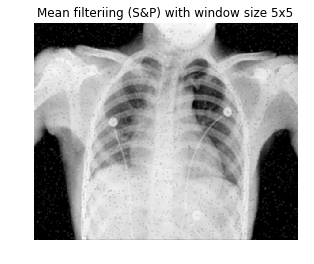

In [44]:
im_chest_mean_noise_sp = np.empty([im_chest_noise_sp.shape[0], im_chest_noise_sp.shape[1]])
for i in range(0, im_chest_noise_sp.shape[0]):
    for j in range(0, im_chest_noise_sp.shape[1]):
        im_chest_mean_noise_sp[i,j] = np.mean(im_chest_noise_sp[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_mean_noise_sp, cmap='gray')
plt.axis('off')
plt.title('Mean filteriing (S&P) with window size '+str(w)+'x'+str(w))
plt.show()

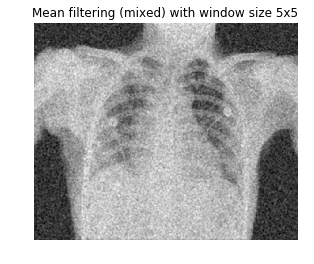

In [45]:
im_chest_mean_noise_mixed = np.empty([im_chest_noise_mixed.shape[0], im_chest_noise_mixed.shape[1]])
for i in range(0, im_chest_noise_mixed.shape[0]):
    for j in range(0, im_chest_noise_mixed.shape[1]):
        im_chest_mean_noise_mixed[i,j] = np.mean(im_chest_noise_mixed[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_mean_noise_mixed, cmap='gray')
plt.axis('off')
plt.title('Mean filtering (mixed) with window size '+str(w)+'x'+str(w))
plt.show()

б) Среднегеометрический фильтр

In [46]:
# Размер окна
w = 5

def geo_mean(area):
    return area.prod()**(1.0/(w*w))

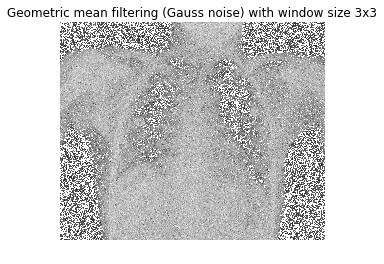

In [47]:
# Размер окна
w = 3

im_chest_geom_noiseg = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_geom_noiseg[i,j] = geo_mean(im_chest_noiseg[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_geom_noiseg, cmap='gray')
plt.axis('off')
plt.title('Geometric mean filtering (Gauss noise) with window size '+str(w)+'x'+str(w))
plt.show()

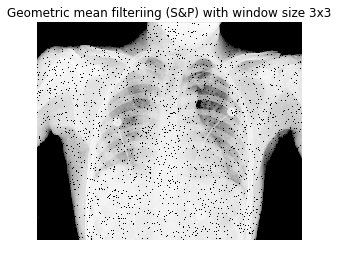

In [48]:
im_chest_geom_noise_sp = np.empty([im_chest_noise_sp.shape[0], im_chest_noise_sp.shape[1]])
for i in range(0, im_chest_noise_sp.shape[0]):
    for j in range(0, im_chest_noise_sp.shape[1]):
        im_chest_geom_noise_sp[i,j] = geo_mean(im_chest_noise_sp[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_geom_noise_sp, cmap='gray')
plt.axis('off')
plt.title('Geometric mean filteriing (S&P) with window size '+str(w)+'x'+str(w))
plt.show()

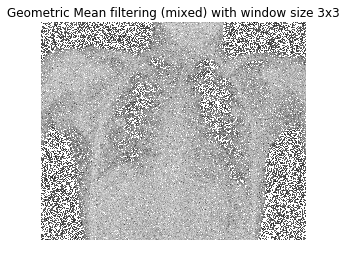

In [49]:
im_chest_geom_noise_mixed = np.empty([im_chest_noise_mixed.shape[0], im_chest_noise_mixed.shape[1]])
for i in range(0, im_chest_noise_mixed.shape[0]):
    for j in range(0, im_chest_noise_mixed.shape[1]):
        im_chest_geom_noise_mixed[i,j] = geo_mean(im_chest_noise_mixed[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_geom_noise_mixed, cmap='gray')
plt.axis('off')
plt.title('Geometric Mean filtering (mixed) with window size '+str(w)+'x'+str(w))
plt.show()

в) Среднегармонический фильтр

In [50]:
from scipy.stats import hmean

In [51]:
def harmonic(pixels):
    hmean = sum(1/pixels)
    return hmean

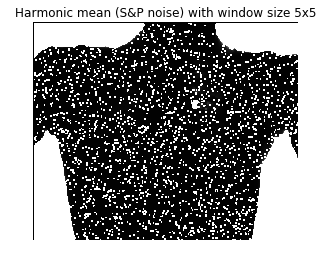

In [52]:
# Размер окна
w = 5

im_chest_garmonic_noiseg = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_garmonic_noiseg[i,j] = harmonic(im_chest_noise_sp[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))].reshape(-1))
        
plt.imshow(im_chest_garmonic_noiseg, cmap='gray')
plt.axis('off')
plt.title('Harmonic mean (S&P noise) with window size '+str(w)+'x'+str(w))
plt.show()

Почему-то среднегармонический фильтр не работает, зато очень концептуально =)

г) Гауссовый фильтр

In [53]:
# размер окна
w = 10

#Значение сигма (рассмотрим два значения)
sigma_1 = 1

# центр маски
x0, y0 = (int(w/2), int(w/2))

gauss_mask_1 = np.empty([w, w])

for i in range(0, w):
    for j in range(0, w):
        gauss_mask_1[i,j] = (1/(2*pi*sigma_1))*exp(-(((i-x0)**2 + (j-y0)**2)/(2*sigma_1**2)))

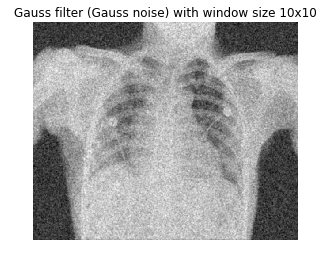

In [54]:
im_chest_gauss_noiseg = ndi.convolve(im_chest_noiseg, gauss_mask_1)
plt.imshow(im_chest_gauss_noiseg, cmap='gray')
plt.title('Gauss filter (Gauss noise) with window size '+str(w)+'x'+str(w))
plt.axis('off')
plt.show()

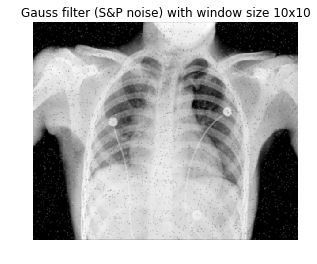

In [55]:
im_chest_gauss_sp = ndi.convolve(im_chest_noise_sp, gauss_mask_1)
plt.imshow(im_chest_gauss_sp, cmap='gray')
plt.title('Gauss filter (S&P noise) with window size '+str(w)+'x'+str(w))
plt.axis('off')
plt.show()

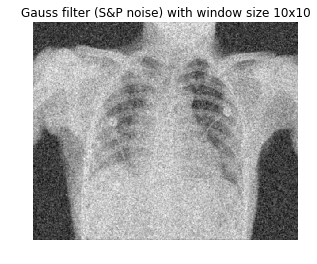

In [56]:
im_chest_gauss_mixed = ndi.convolve(im_chest_noise_mixed, gauss_mask_1)
plt.imshow(im_chest_gauss_mixed, cmap='gray')
plt.title('Gauss filter (S&P noise) with window size '+str(w)+'x'+str(w))
plt.axis('off')
plt.show()

2 . Упорядочивающие фильтры

а) Медианный фильтр

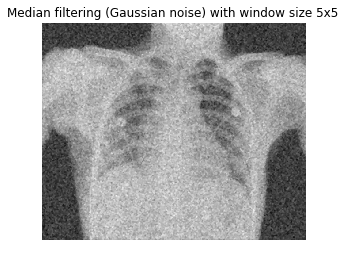

In [57]:
w = 5

im_chest_median_noiseg = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_median_noiseg[i,j] = np.median(im_chest_noiseg[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_median_noiseg, cmap='gray')
plt.axis('off')
plt.title('Median filtering (Gaussian noise) with window size '+str(w)+'x'+str(w))
plt.show()

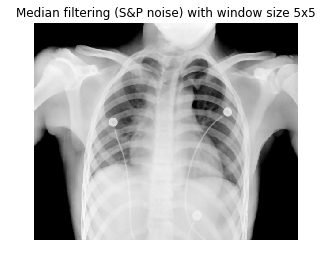

In [58]:
w = 5

im_chest_median_sp = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_median_sp[i,j] = np.median(im_chest_noise_sp[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_median_sp, cmap='gray')
plt.axis('off')
plt.title('Median filtering (S&P noise) with window size '+str(w)+'x'+str(w))
plt.show()

Идеально!

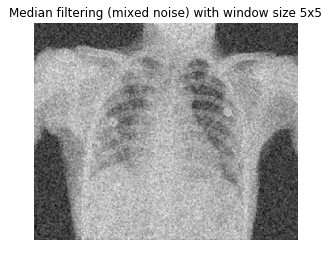

In [59]:
w = 5

im_chest_median_mixed = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_median_mixed[i,j] = np.median(im_chest_noise_mixed[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))])
        
plt.imshow(im_chest_median_mixed, cmap='gray')
plt.axis('off')
plt.title('Median filtering (mixed noise) with window size '+str(w)+'x'+str(w))
plt.show()

б) Фильтр усеченного среднего

In [60]:
# Количество отбрасываемых пикселей
k = 3
# Размер окна
w = 5

def trunc_mean(pixels):
    pix_sorted = np.sort(pixels)
    trunc_mean = np.mean(pix_sorted[k:-k])
    return trunc_mean

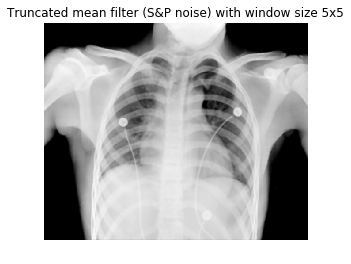

In [61]:
im_chest_tmean_noisesp = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_tmean_noisesp[i,j] = trunc_mean(im_chest_noise_sp[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))].reshape(-1))
        
plt.imshow(im_chest_tmean_noisesp, cmap='gray')
plt.axis('off')
plt.title('Truncated mean filter (S&P noise) with window size '+str(w)+'x'+str(w))
plt.show()

Фильтр справился идеально

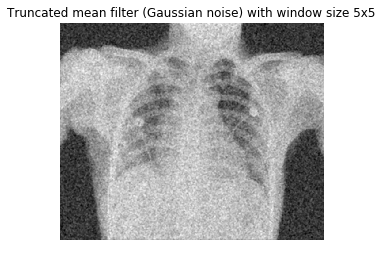

In [62]:
im_chest_tmean_noiseg = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_tmean_noiseg[i,j] = trunc_mean(im_chest_noiseg[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))].reshape(-1))
        
plt.imshow(im_chest_tmean_noiseg, cmap='gray')
plt.axis('off')
plt.title('Truncated mean filter (Gaussian noise) with window size '+str(w)+'x'+str(w))
plt.show()

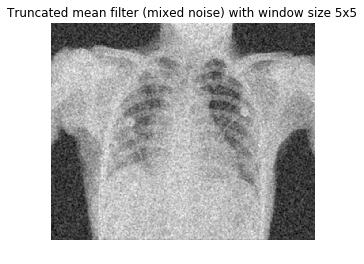

In [63]:
im_chest_tmean_noise_mixed = np.empty([im_chest_noise_mixed.shape[0], im_chest_noiseg.shape[1]])
for i in range(0, im_chest_noiseg.shape[0]):
    for j in range(0, im_chest_noiseg.shape[1]):
        im_chest_tmean_noise_mixed[i,j] = trunc_mean(im_chest_noise_mixed[(i-int(w/2)):(i+int(w/2)), (j-int(w/2)):(j+int(w/2))].reshape(-1))
        
plt.imshow(im_chest_tmean_noise_mixed, cmap='gray')
plt.axis('off')
plt.title('Truncated mean filter (mixed noise) with window size '+str(w)+'x'+str(w))
plt.show()

в) Фильтр Кувахары    
Воспользуемся имплементацией фильтра Кувахары, представленной на GitHub'е:    
https://github.com/adussault/python-kuwahara/blob/master/Kuwahara.py

In [64]:
def Kuwahara(original, winsize):
    """
    Kuwahara filters an image using the Kuwahara filter
    
    Inputs:
    original      -->    image to be filtered
    windowSize    -->    size of the filter window: legal values are
                                                    5, 9, 13, ... = (4*k+1)
   
    """
    
    image = original.astype(np.float64)
    # make sure window size is correct
    if winsize%4 != 1:
        raise Exception ("Invalid winsize %s: winsize must follow formula: w = 4*n+1." %winsize)

    #Build subwindows
    tmpAvgKerRow = np.hstack((np.ones((1,int((winsize-1)/2+1))),np.zeros((1,int((winsize-1)/2)))))
    tmpPadder = np.zeros((1,winsize))
    tmpavgker = np.tile(tmpAvgKerRow, (int((winsize-1)/2+1),1))
    tmpavgker = np.vstack((tmpavgker, np.tile(tmpPadder, (int((winsize-1)/2),1))))
    tmpavgker = tmpavgker/np.sum(tmpavgker)

    # tmpavgker is a 'north-west' subwindow (marked as 'a' above)
    # we build a vector of convolution kernels for computing average and
    # variance
    avgker = np.empty((4,winsize,winsize)) # make an empty vector of arrays
    avgker[0] = tmpavgker # North-west (a)
    avgker[1] = np.fliplr(tmpavgker) # North-east (b)
    avgker[2] = np.flipud(tmpavgker) # South-west (c)
    avgker[3] = np.fliplr(avgker[2]) # South-east (d)
    
    # Create a pixel-by-pixel square of the image
    squaredImg = image**2

    # preallocate these arrays to make it apparently %15 faster
    avgs = np.zeros([4, image.shape[0],image.shape[1]])
    stddevs = avgs.copy()

    # Calculation of averages and variances on subwindows
    for k in range(4):
        avgs[k] = convolve2d(image, avgker[k],mode='same')    # mean on subwindow
        stddevs[k] = convolve2d(squaredImg, avgker[k],mode='same') # mean of squares on subwindow
        stddevs[k] = stddevs[k]-avgs[k]**2 # variance on subwindow
   

    # Choice of index with minimum variance
    indices = np.argmin(stddevs,0) # returns index of subwindow with smallest variance

    # Building the filtered image (with nested for loops)
    filtered = np.zeros(original.shape)
    for row in range(original.shape[0]):
        for col in range(original.shape[1]):
            filtered[row,col] = avgs[indices[row,col], row,col]
            #print(filtered[row,col])

    #filtered=filtered.astype(np.uint8)
    return filtered

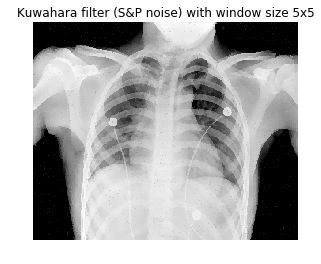

In [65]:
# Размер окна
w = 5
im_chest_kuwahara_noisesp = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])

im_chest_kuwahara_noisesp = Kuwahara(im_chest_noise_sp, w)

plt.imshow(im_chest_kuwahara_noisesp, cmap='gray')
plt.axis('off')
plt.title('Kuwahara filter (S&P noise) with window size '+str(w)+'x'+str(w))
plt.show()

Фильтр справился с шумом типа "Соль и перец"

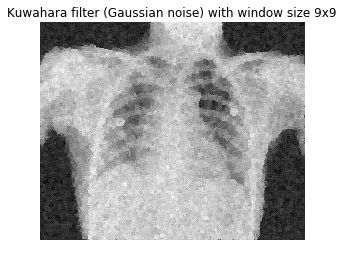

In [66]:
# Размер окна
w = 9
im_chest_kuwahara_noiseg = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])

im_chest_kuwahara_noiseg = Kuwahara(im_chest_noiseg, w)

plt.imshow(im_chest_kuwahara_noiseg, cmap='gray')
plt.axis('off')
plt.title('Kuwahara filter (Gaussian noise) with window size '+str(w)+'x'+str(w))
plt.show()

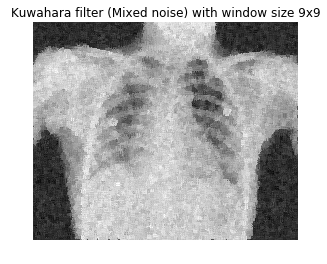

In [67]:
w = 9
im_chest_kuwahara_noise_mixed = np.empty([im_chest_noiseg.shape[0], im_chest_noiseg.shape[1]])

im_chest_kuwahara_noise_mixed = Kuwahara(im_chest_noise_mixed, w)

plt.imshow(im_chest_kuwahara_noise_mixed, cmap='gray')
plt.axis('off')
plt.title('Kuwahara filter (Mixed noise) with window size '+str(w)+'x'+str(w))
plt.show()

# Заключение: оценка качества подавления шумов

## Сравнение зашумленных изображений с исходными

In [68]:
D_noiseg = np.abs(im_chest_noiseg - im_chest) # Гауссов шум
D_noise_sp = np.abs(im_chest_noise_sp - im_chest) # Соль и перец
D_noise_mixed = np.abs(im_chest_noise_mixed - im_chest) # смешанный

In [69]:
# Функция вывода итоговой информации и построения гистограммы
def summary(name, D_noise, bins=12):
    D_noise_hist = plt.hist(D_noise.reshape(-1), bins = bins)
    plt.title("Гистограмма модуля разности: "+ name + " и исходное изображения")
    plt.xlabel("Значения интенсивностей")
    plt.ylabel("Кол-во пикселей")
    plt.grid()
    plt.show()
    print("Среднее значение гисторгаммы модуля разности: " + str(np.mean(D_noise_hist[0])))
    print("Среднее значение модуля разности: " + "%.2f"%(np.mean(D_noiseg)))
    print("СКО гисторгаммы модуля разности: " + "%.2f"%(np.std(D_noise_hist[0])))
    print("СКО модуля разности: " + "%.2f"%(np.std(D_noiseg)))
    print("Максимальное отклонение гисторгаммы модуля разности: " +  str(np.max(D_noise_hist[0])))
    print("Максимальное отклонение модуля разности: " +  "%.2f"%(np.max(D_noiseg)))
    print("Первый квантиль: " + "%.2f"%sum(D_noise_hist[0][0:int(bins/4)])) 
    print("Второй квантиль: " + "%.2f"%sum(D_noise_hist[0][int(bins/4):2*int(bins/4)])) 
    print("Третий квантиль: " + "%.2f"%sum(D_noise_hist[0][2*int(bins/4):3*int(bins/4)])) 
    print("Четвертый квантиль: " + "%.2f"%sum(D_noise_hist[0][3*int(bins/4):4*int(bins/4)])) 

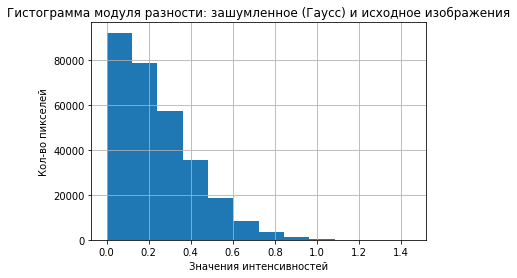

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 32145.96
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 92257.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 228218.00
Второй квантиль: 62854.00
Третий квантиль: 4653.00
Четвертый квантиль: 75.00


In [70]:
summary("зашумленное (Гаусс)", D_noiseg)

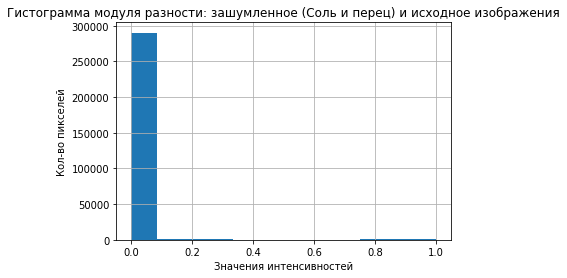

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 80032.47
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 290087.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 291524.00
Второй квантиль: 1175.00
Третий квантиль: 994.00
Четвертый квантиль: 2107.00


In [71]:
summary("зашумленное (Соль и перец)", D_noise_sp)

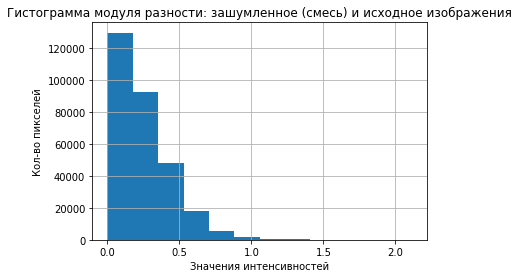

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 41519.06
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 129472.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 270053.00
Второй квантиль: 24892.00
Третий квантиль: 833.00
Четвертый квантиль: 22.00


In [72]:
summary("зашумленное (смесь)", D_noise_mixed)

## Сравнение изображений после подавления шумов с исходными

### После усредняющих фильтров

a) Среднеарифметический фильтр

In [101]:
D_noiseg_mean = np.nan_to_num(np.abs(im_chest_mean_noiseg - im_chest)) # Гауссов шум
D_noise_sp_mean =  np.nan_to_num(np.abs(im_chest_mean_noise_sp - im_chest)) # Соль и перец
D_noise_mixed_mean =  np.nan_to_num(np.abs(im_chest_mean_noise_mixed - im_chest))# смешанный

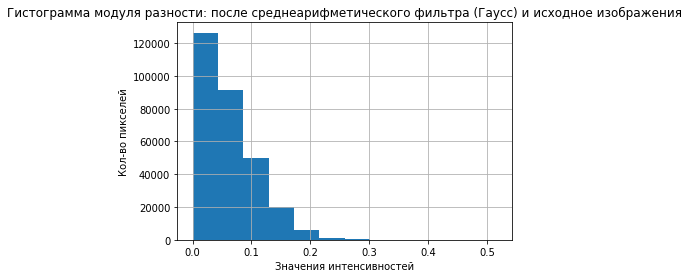

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 40820.87
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 126345.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 267870.00
Второй квантиль: 27354.00
Третий квантиль: 537.00
Четвертый квантиль: 39.00


In [103]:
summary("после среднеарифметического фильтра (Гаусс)", D_noiseg_mean)

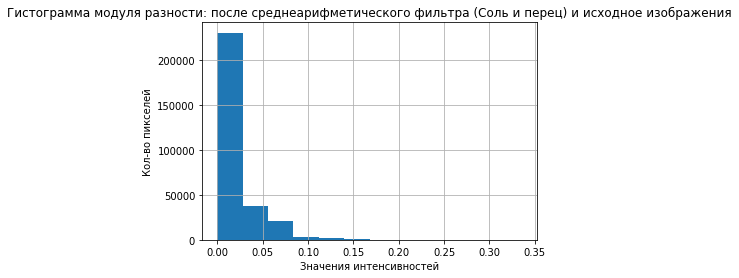

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 62987.02
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 230210.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 289404.00
Второй квантиль: 5704.00
Третий квантиль: 356.00
Четвертый квантиль: 336.00


In [104]:
summary("после среднеарифметического фильтра (Соль и перец)", D_noise_sp_mean)

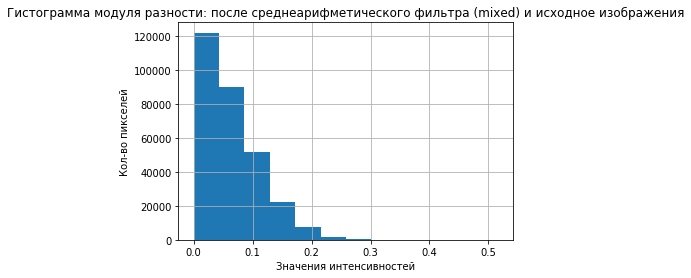

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 39675.97
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 121833.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 263595.00
Второй квантиль: 31451.00
Третий квантиль: 719.00
Четвертый квантиль: 35.00


In [105]:
summary("после среднеарифметического фильтра (mixed)", D_noise_mixed_mean)

б) Среднегеометрический фильтр

In [111]:
D_noiseg_geom =  np.nan_to_num(np.abs(im_chest_geom_noiseg - im_chest)) # Гауссов шум
D_noise_sp_geom =  np.nan_to_num(np.abs(im_chest_geom_noise_sp - im_chest)) # Соль и перец
D_noise_mixed_geom =  np.nan_to_num(np.abs(im_chest_geom_noise_mixed - im_chest)) # смешанный

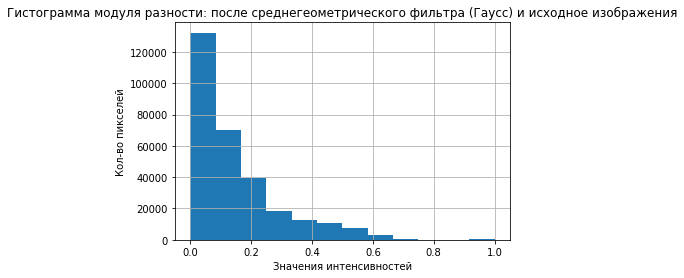

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 38064.86
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 132262.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 242035.00
Второй квантиль: 42185.00
Третий квантиль: 10813.00
Четвертый квантиль: 767.00


In [113]:
summary("после среднегеометрического фильтра (Гаусс)", D_noiseg_geom)

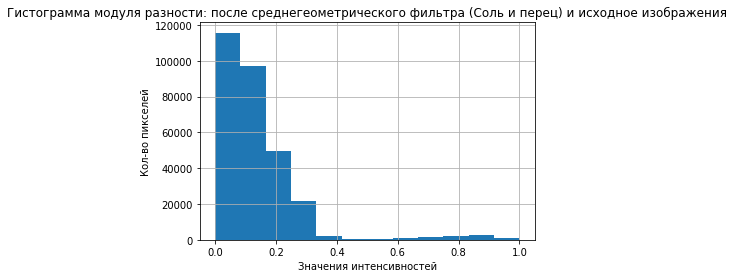

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 39239.24
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 115650.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 262479.00
Второй квантиль: 24690.00
Третий квантиль: 3013.00
Четвертый квантиль: 5618.00


In [114]:
summary("после среднегеометрического фильтра (Соль и перец)", D_noise_sp_geom)

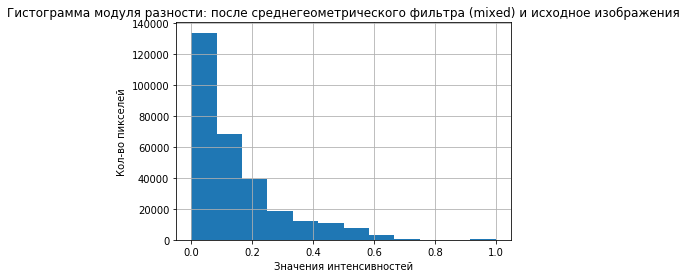

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 38260.14
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 133890.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 241649.00
Второй квантиль: 41967.00
Третий квантиль: 11383.00
Четвертый квантиль: 801.00


In [115]:
summary("после среднегеометрического фильтра (mixed)", D_noise_mixed_geom)

в) Гауссов фильтр

In [119]:
D_noiseg_gauss =  np.nan_to_num(np.abs(im_chest_gauss_noiseg - im_chest)) # Гауссов шум
D_noise_sp_gauss =  np.nan_to_num(np.abs(im_chest_gauss_sp - im_chest)) # Соль и перец
D_noise_mixed_gauss =  np.nan_to_num(np.abs(im_chest_gauss_mixed - im_chest)) # смешанный

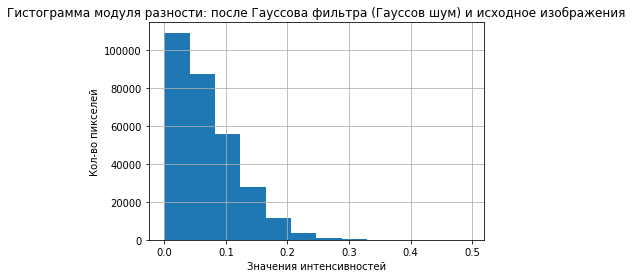

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 36708.78
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 108931.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 251576.00
Второй квантиль: 42911.00
Третий квантиль: 1301.00
Четвертый квантиль: 12.00


In [120]:
summary("после Гауссова фильтра (Гауссов шум)", D_noiseg_gauss)

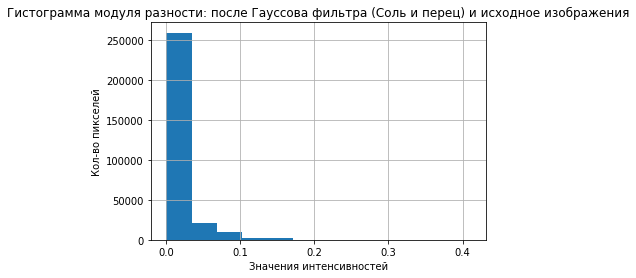

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 71102.92
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 259623.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 290723.00
Второй квантиль: 4883.00
Третий квантиль: 190.00
Четвертый квантиль: 4.00


In [122]:
summary("после Гауссова фильтра (Соль и перец)", D_noise_sp_gauss)

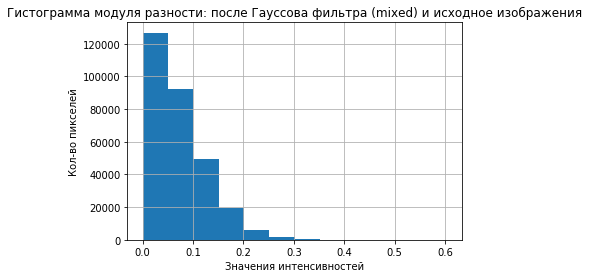

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 41004.98
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 126693.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 268601.00
Второй квантиль: 26817.00
Третий квантиль: 372.00
Четвертый квантиль: 10.00


In [123]:
summary("после Гауссова фильтра (mixed)", D_noise_mixed_gauss)

### После упорядочивающих фильтров

a) Медианный фильтр

In [124]:
D_noiseg_median =  np.nan_to_num(np.abs(im_chest_median_noiseg - im_chest)) # Гауссов шум
D_noise_sp_median =  np.nan_to_num(np.abs(im_chest_median_sp - im_chest)) # Соль и перец
D_noise_mixed_median =  np.nan_to_num(np.abs(im_chest_median_mixed - im_chest)) # смешанный

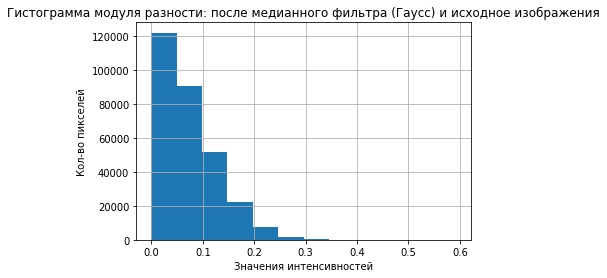

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 39703.28
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 121767.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 263662.00
Второй квантиль: 31483.00
Третий квантиль: 617.00
Четвертый квантиль: 38.00


In [125]:
summary("после медианного фильтра (Гаусс)", D_noiseg_median)

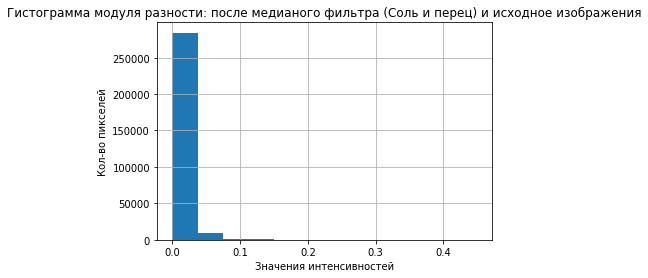

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 78276.79
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 284143.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 294601.00
Второй квантиль: 763.00
Третий квантиль: 64.00
Четвертый квантиль: 372.00


In [126]:
summary("после медианого фильтра (Соль и перец)", D_noise_sp_median)

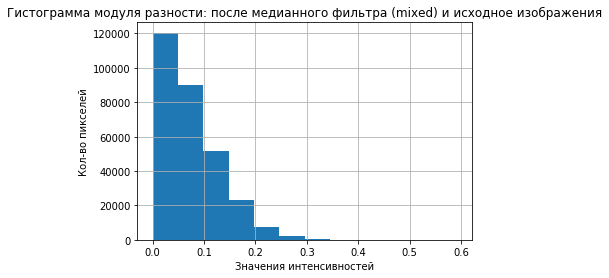

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 39339.85
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 120398.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 262176.00
Второй квантиль: 32913.00
Третий квантиль: 674.00
Четвертый квантиль: 37.00


In [127]:
summary("после медианного фильтра (mixed)", D_noise_mixed_median)

б) Фильтр урезанного среднего

In [129]:
D_noiseg_tmean =  np.nan_to_num(np.abs(im_chest_tmean_noiseg - im_chest)) # Гауссов шум
D_noise_sp_tmean =  np.nan_to_num(np.abs(im_chest_tmean_noisesp - im_chest)) # Соль и перец
D_noise_mixed_tmean =  np.nan_to_num(np.abs(im_chest_tmean_noise_mixed - im_chest))# смешанный

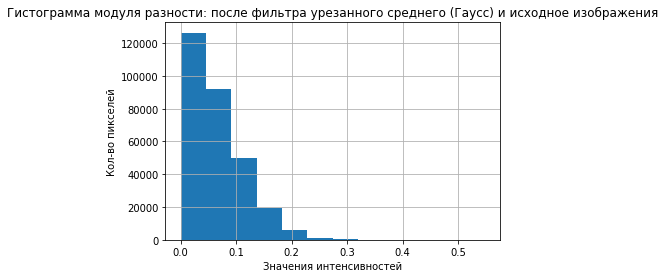

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 40884.57
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 126282.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 268434.00
Второй квантиль: 26861.00
Третий квантиль: 469.00
Четвертый квантиль: 36.00


In [130]:
summary("после фильтра урезанного среднего (Гаусс)", D_noiseg_tmean)

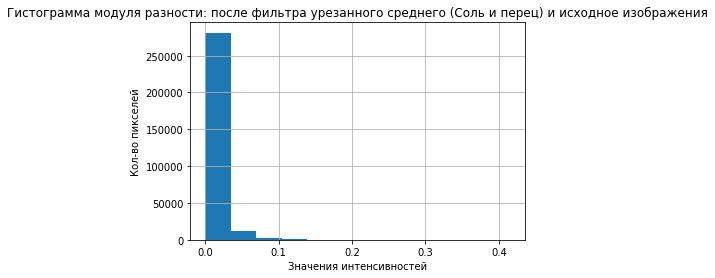

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 77358.62
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 281015.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 294478.00
Второй квантиль: 895.00
Третий квантиль: 81.00
Четвертый квантиль: 346.00


In [132]:
summary("после фильтра урезанного среднего (Соль и перец)", D_noise_sp_tmean)

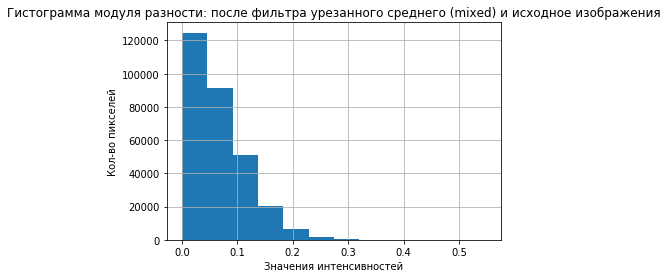

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 40438.07
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 124598.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 266767.00
Второй квантиль: 28458.00
Третий квантиль: 543.00
Четвертый квантиль: 32.00


In [133]:
summary("после фильтра урезанного среднего (mixed)", D_noise_mixed_tmean)

в) Фильтр Кувахары

In [134]:
D_noiseg_kuwahara =  np.nan_to_num(np.abs(im_chest_kuwahara_noiseg - im_chest)) # Гауссов шум
D_noise_sp_kuwahara =  np.nan_to_num(np.abs(im_chest_kuwahara_noisesp - im_chest)) # Соль и перец
D_noise_mixed_kuwahara =  np.nan_to_num(np.abs(im_chest_kuwahara_noise_mixed - im_chest)) # смешанный

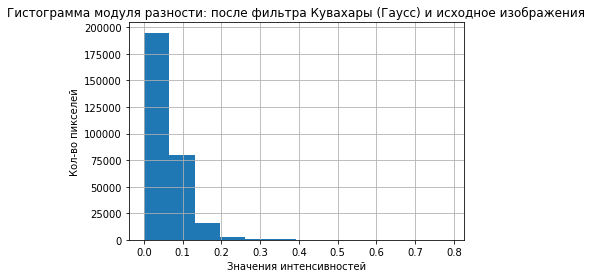

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 55821.76
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 194928.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 291266.00
Второй квантиль: 4085.00
Третий квантиль: 342.00
Четвертый квантиль: 107.00


In [135]:
summary("после фильтра Кувахары (Гаусс)", D_noiseg_kuwahara)

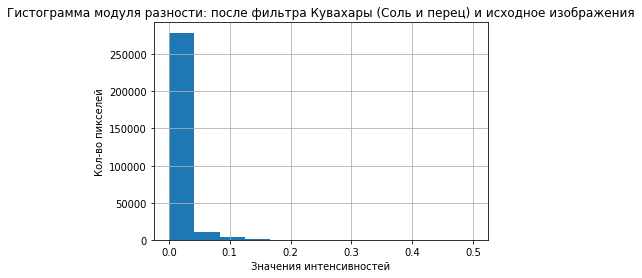

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 76749.64
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 278998.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 294204.00
Второй квантиль: 1196.00
Третий квантиль: 398.00
Четвертый квантиль: 2.00


In [136]:
summary("после фильтра Кувахары (Соль и перец)", D_noise_sp_kuwahara)

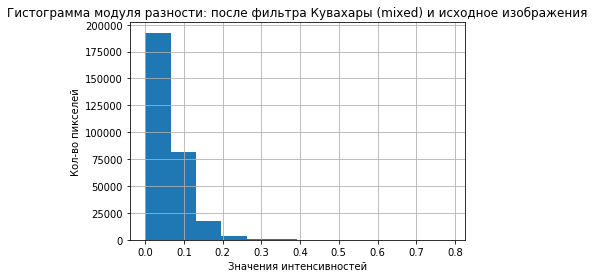

Среднее значение гисторгаммы модуля разности: 24650.0
Среднее значение модуля разности: 0.24
СКО гисторгаммы модуля разности: 55266.79
СКО модуля разности: 0.18
Максимальное отклонение гисторгаммы модуля разности: 192472.0
Максимальное отклонение модуля разности: 1.45
Первый квантиль: 290863.00
Второй квантиль: 4405.00
Третий квантиль: 384.00
Четвертый квантиль: 148.00


In [137]:
summary("после фильтра Кувахары (mixed)", D_noise_mixed_kuwahara)

## Выводы

Можно отметить, что:
- наилучшим образом устраняется шум типа "Соль и перец";
- фильтр Кувахары превосходит остальные фильтры по качеству. Модуль разности изображений в этом случае получается наименьшим, следовательно, изображение после утсранения шумов более похоже на исходное